# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import api_keys
import random
import gmaps
import json
import os
import re

# Import API key and tools
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
from pprint import pprint
from scipy import stats

## Generate Cities List

In [ ]:
#Generate range
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

In [45]:
# Print the city count to confirm sufficient count
len(weather_df)

586

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Save config information
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------


In [4]:
# Loop through the list of cities and perform a request
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Processing Record 1 | Hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=hokitika
Processing Record 2 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=busselton
Processing Record 3 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=kavieng
Processing Record 4 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=cidreira
Processing Record 5 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=camacha
Processing Record 6 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=hasaki
Processing Record 7 | Charagua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=charagua
City 

Processing Record 56 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=sitka
Processing Record 57 | Mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=mao
Processing Record 58 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=provideniya
Processing Record 59 | Ialibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=ialibu
Processing Record 60 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=geraldton
Processing Record 61 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=hermanus
Processing Record 62 | Severo-Kuril'sk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=seve

Processing Record 112 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=guerrero%20negro
Processing Record 113 | Sungai Penuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=sungaipenuh
Processing Record 114 | San Luis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=san%20luis
Processing Record 115 | San Miguel de Tucumán
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=tucuman
Processing Record 116 | Nago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=nago
Processing Record 117 | Inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=inuvik
Processing Record 118 | Sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6

Processing Record 168 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=vanimo
Processing Record 169 | Robertsport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=robertsport
City not found. Skipping...
Processing Record 170 | Kuching
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=kuching
Processing Record 171 | Klaksvík
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=klaksvik
Processing Record 172 | Balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=balabac
Processing Record 173 | Luang Prabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=luang%20prabang
Processing Record 174 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?

City not found. Skipping...
Processing Record 224 | Berlin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=berlin
Processing Record 225 | Aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=aquiraz
Processing Record 226 | Dibulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=dibulla
Processing Record 227 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=yulara
City not found. Skipping...
City not found. Skipping...
Processing Record 228 | Wajima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=wajima
Processing Record 229 | Damietta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=damietta
Processing Record 230 | Marsabit
http://api.openweathermap.org

Processing Record 279 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=los%20llanos%20de%20aridane
Processing Record 280 | Conde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=conde
Processing Record 281 | Berlevåg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=berlevag
Processing Record 282 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=olafsvik
Processing Record 283 | Nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=nabire
Processing Record 284 | Bayir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=bayir
Processing Record 285 | Igarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098

Processing Record 335 | Swan River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=swan%20river
Processing Record 336 | Fort Saint James
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=fort%20saint%20james
Processing Record 337 | Yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=yumen
Processing Record 338 | Abu Samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=abu%20samrah
Processing Record 339 | Mpongwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=mpongwe
Processing Record 340 | Venice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=venice
Processing Record 341 | Jiaxing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6e

Processing Record 391 | Viseu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=viseu
Processing Record 392 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=nantucket
Processing Record 393 | Coos Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=coos%20bay
Processing Record 394 | Ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=ossora
Processing Record 395 | Rozkishne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=rozkishne
City not found. Skipping...
Processing Record 396 | Oxford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=oxford
Processing Record 397 | Trat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb50

City not found. Skipping...
Processing Record 447 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=flinders
Processing Record 448 | Gashua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=gashua
City not found. Skipping...
Processing Record 449 | Sept-Îles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=sept-iles
Processing Record 450 | Camaná
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=camana
Processing Record 451 | Acapulco de Juárez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=acapulco
Processing Record 452 | Nicoya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=nicoya
Processing Record 453 | Jieshi
http://api.openweathermap.org/data/2.5/weat

Processing Record 503 | Verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=verkhoyansk
Processing Record 504 | Port Shepstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=port%20shepstone
Processing Record 505 | Zimmi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=zimmi
Processing Record 506 | Lukoyanov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=lukoyanov
Processing Record 507 | Rokupr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=rokupr
Processing Record 508 | Maltahöhe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=maltahohe
Processing Record 509 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6e

Processing Record 559 | Ajdabiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=ajdabiya
Processing Record 560 | Calabozo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=calabozo
Processing Record 561 | Saryozek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=saryozek
City not found. Skipping...
Processing Record 562 | Gizo Government Station
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=gizo
Processing Record 563 | Refojos de Basto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=refojos%20de%20basto
City not found. Skipping...
Processing Record 564 | Swan Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=swan%20hill
City not found. Skipping...
City not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Export the city data into a .csv.
weather_df.to_csv("output_data/cities.csv")

In [5]:
# Build dataFrame with url query    
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame.from_dict(weather_dict, orient="index")
weather_df = weather_data.transpose()
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hokitika,0,NZ,1599539044,69,-42.72,170.97,53.55,6.98
1,Busselton,85,AU,1599539045,71,-33.65,115.33,63,7
2,Kavieng,5,PG,1599539046,74,-2.57,150.8,84.81,11.01
3,Cidreira,100,BR,1599538501,92,-30.18,-50.21,58.55,17.34
4,Camacha,40,PT,1599538457,83,33.08,-16.33,71.6,13.87
...,...,...,...,...,...,...,...,...,...
581,Howard Springs,75,AU,1599539546,13,-12.5,131.05,97,12.75
582,Shahrud,63,IR,1599539547,18,36.42,54.98,79.23,5.39
583,São João da Barra,40,BR,1599539549,87,-21.64,-41.05,72.86,19.08
584,Paso de Carrasco,17,UY,1599539549,76,-34.86,-56.05,48.2,4.7


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# removing null values to avoid errors  
weather_df.dropna(inplace = True)  

perc =[.50, .75, .100] 
include =['object', 'float', 'int'] 
  
# Display stats of weather data and inspect values 
stats_df = weather_df.describe(percentiles = perc, include = include) 
stats_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,586,586,586,586,586,586.00,586.0,586.0,586.00
unique,586,92,116,389,91,573.00,576.0,350.0,307.00
top,Poum,0,RU,1599539126,93,65.97,135.6,73.4,3.36
freq,1,84,68,4,27,2.00,2.0,13.0,24.00


In [12]:
#  Get the indices of cities that have humidity over 100%.
find_first = []
for i in range(len(weather_df)):
    if (weather_df.loc[i, 'Humidity'] == False and df.loc[i+100, 'Humidity'] == True):
        find_first.append(i+1)
find_first

[]

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
outliers = weather_df.Humidity > 100 
pd.DataFrame(outliers)

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# clean_city_data = outliers.loc[outliers["Humidity"] > 100, "Cities with +100 Humidity"] = 'True'
# weather_df.loc[weather_df['Humidity'] > 100, 'Cities with less Humidity'] = 'False' 
# clean_city_data



,Humidity
0,False
1,False
2,False
3,False
4,False
...,...
581,False
582,False
583,False
584,False


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

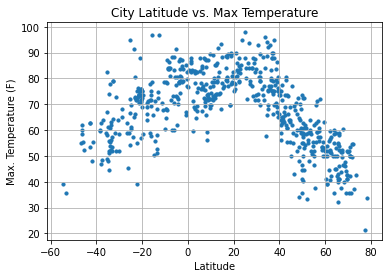

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

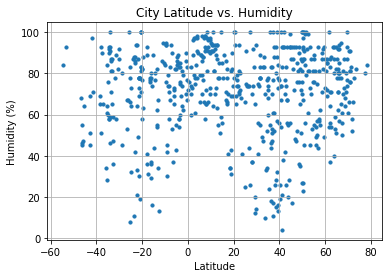

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

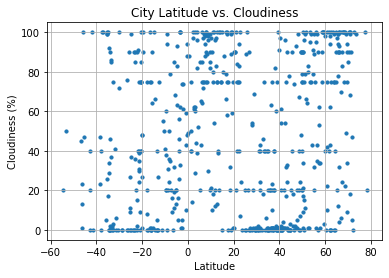

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

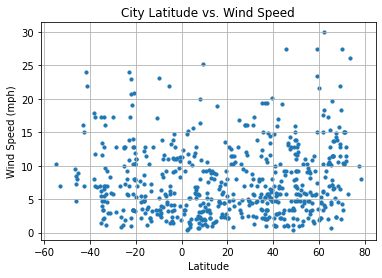

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [21]:
#Create variables and DataFrame for linear regression
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,Camacha,40,PT,1599538457,83,33.08,-16.33,71.6,13.87
5,Hasaki,20,JP,1599539047,55,35.73,140.83,93,14.99
10,Broome,1,US,1599538513,77,42.25,-75.83,66,5.82
13,Straumen,75,NO,1599539052,87,63.87,11.3,55,17.22
14,Longyearbyen,20,SJ,1599539052,84,78.22,15.64,33.8,8.05
...,...,...,...,...,...,...,...,...,...
578,Kaabong,44,UG,1599539545,84,3.48,34.15,64.51,5.19
579,Chifeng,54,CN,1599539546,42,42.27,118.96,73.45,17.02
580,Qaqortoq,10,GL,1599539546,72,60.72,-46.03,39.2,2.24
582,Shahrud,63,IR,1599539547,18,36.42,54.98,79.23,5.39


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.56x + 88.34
The r-squared is: -0.7628832094371074
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


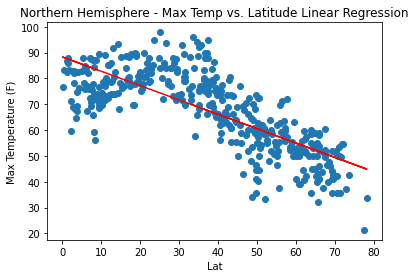

In [35]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.59x + 80.75
The r-squared is: 0.6341510523806688
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


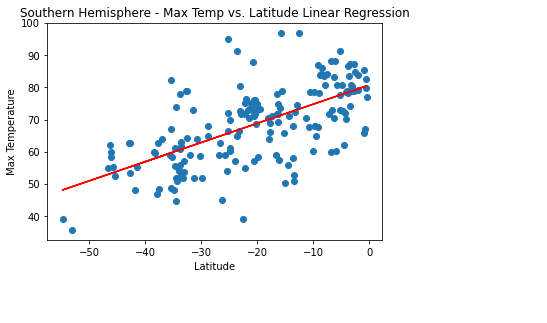

In [36]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.08x + 75.08
The r-squared is: -0.0799989704411452
The regression does not display much of a correlation between the data sets.


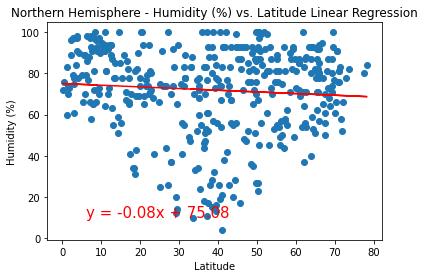

In [37]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.09x + 71.1
The r-squared is: 0.05560712210877677
The regression does not display much of a correlation between the data sets.


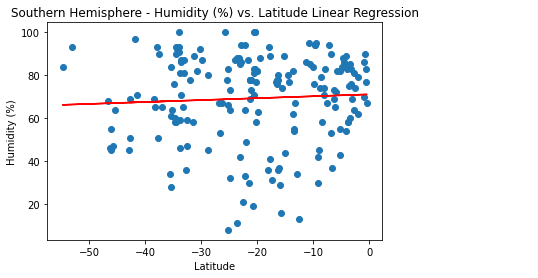

In [38]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 53.81
The r-squared is: -0.036058947844212874
The regression does not display much of a correlation between the data sets.


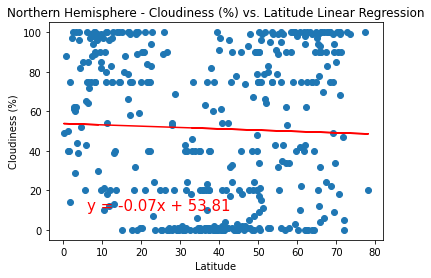

In [39]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 43.45
The r-squared is: 0.06461011068512189
The regression does not display much of a correlation between the data sets.


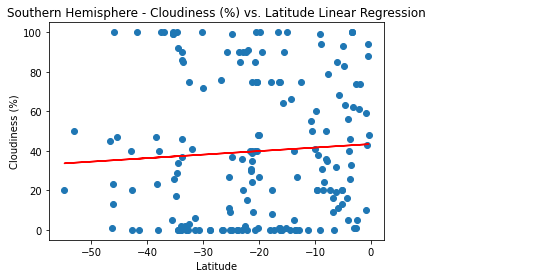

In [40]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 5.33
The r-squared is: 0.23510645071694092
The regression does not display much of a correlation between the data sets.


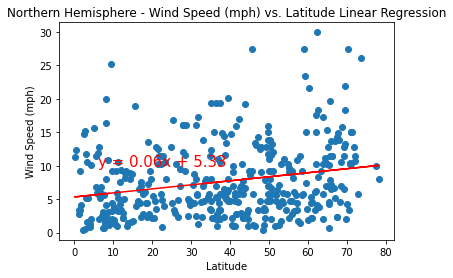

In [42]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 6.85
The r-squared is: -0.14127741047036804
The regression does not display much of a correlation between the data sets.


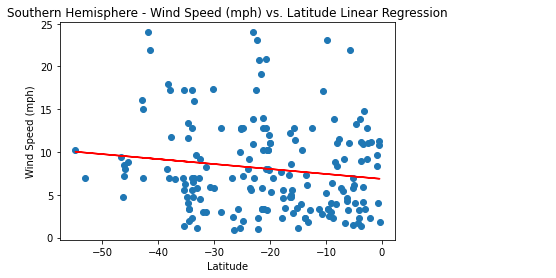

In [41]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()